In [ ]:
# Install necessary packages
%pip install kagglehub face_recognition opencv-python-headless matplotlib seaborn tensorflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.1/100.1 MB 5.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566166 sha256=c76ea0c7aadd2f3d42cb87a33491dca5f79fe6e5c04ea168b3e6c2e508659833
  Stored in directory: /root/.cache/pip/wheels/04/52/ec/9355da79c29f160b038a20c784db2803c2f9fa2c8a462c176a
Successfully built face-recognition-models


In [2]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppresses TensorFlow logs

In [8]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import face_recognition

In [9]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("sanikatiwarekar/deep-fake-detection-dfd-entire-original-dataset")

# print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/deep-fake-detection-dfd-entire-original-dataset


In [ ]:
# import kagglehub

# # Download latest version
# path = kagglehub.dataset_download("hungle3401/faceforensics")

# print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/faceforensics


In [10]:
import cv2
import face_recognition
import numpy as np

def extract_faces_from_video(video_path, max_faces=10, target_size=(128, 128)):
    video_capture = cv2.VideoCapture(video_path)
    faces_out = []

    while len(faces_out) < max_faces:
        ret, frame = video_capture.read()
        if not ret:
            break  # Stop if the video ends

        # Convert BGR to RGB for face_recognition
        rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

        # Detect all faces in the frame
        face_locations = face_recognition.face_locations(rgb_frame)

        for top, right, bottom, left in face_locations:
            face = rgb_frame[top:bottom, left:right]

            # Resize face to target size for consistency
            face_resized = cv2.resize(face, target_size)

            faces_out.append(face_resized)

            # Stop if we collected enough faces
            if len(faces_out) >= max_faces:
                break

    video_capture.release()
    return np.array(faces_out) if faces_out else None  # Return None if no faces found


In [11]:
from tensorflow.keras.applications import ResNet50
resnet_model = ResNet50(weights="imagenet", include_top=False, pooling="avg")

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
def extract_features_from_face(face_img):

    face_resized = cv2.resize(face_img, (224, 224))
    face_array = img_to_array(face_resized)
    face_array = np.expand_dims(face_array, axis=0)
    face_array = preprocess_input(face_array)
    features = resnet_model.predict(face_array)
    return features.flatten()


In [13]:
def process_video_dataset(dataset_path, label, max_videos=50):
    X, y = [], []
    video_files = os.listdir(dataset_path)
    video_files = video_files[:max_videos]  # limit number for demonstration

    for video_file in video_files:
        video_path = os.path.join(dataset_path, video_file)
        faces = extract_faces_from_video(video_path)
        if faces:  # Only use videos with detected faces
            # Average features from all detected faces in the video
            face_features = [extract_features_from_face(face) for face in faces]
            video_features = np.mean(face_features, axis=0)
            X.append(video_features)
            y.append(label)
    return np.array(X), np.array(y)



In [ ]:
# Process manipulated videos (label=1)
X_manipulated, y_manipulated = process_video_dataset("/kaggle/input/faceforensics/FF++/fake", label=1, max_videos=50)
# Process original videos (label=0)
X_original, y_original = process_video_dataset("/kaggle/input/faceforensics/FF++/real", label=0, max_videos=50)

# Combine the data for training
X_train = np.concatenate((X_manipulated, X_original), axis=0)
y_train = np.concatenate((y_manipulated, y_original), axis=0)
print("Training feature shape:", X_train.shape)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━

In [ ]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.layers import LeakyReLU

model = Sequential([
    Dense(512, input_dim=X_train.shape[1], kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(256, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(128, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.2),

    Dense(1, activation='sigmoid')
])

# Compile Model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

# Print Model Summary
model.summary()



In [ ]:
history = model.fit(X_tr, y_tr, epochs=20, batch_size=32, validation_data=(X_val, y_val))

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.6016 - loss: 2.0311 - val_accuracy: 0.5500 - val_loss: 2.0093
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7500 - loss: 1.8068 - val_accuracy: 0.6500 - val_loss: 1.9385
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.8852 - loss: 1.6279 - val_accuracy: 0.6500 - val_loss: 1.8852
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9172 - loss: 1.6020 - val_accuracy: 0.8000 - val_loss: 1.8490
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.8813 - loss: 1.5878 - val_accuracy: 0.8000 - val_loss: 1.8307
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9305 - loss: 1.5441 - val_accuracy: 0.8000 - val_loss: 1.8175
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.9398 - loss: 1.4773 - val_accuracy: 0.8000 - val_loss: 1.8108
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.9195 - loss: 1.4910 - val_accuracy: 0.7500 - val_loss: 1.8087
Ep

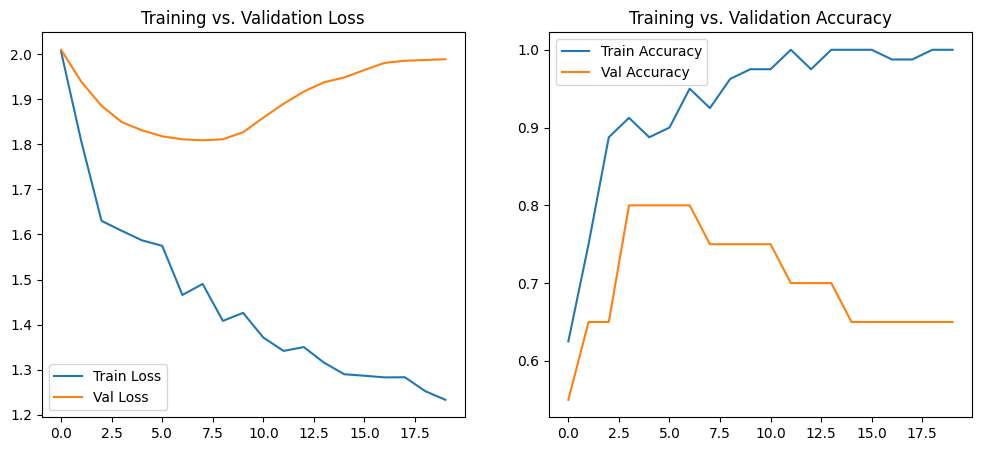

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs. Validation Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()

In [ ]:
# Evaluate on the validation set
y_val_pred_prob = model.predict(X_val)
y_val_pred = (y_val_pred_prob > 0.5).astype("int32")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step


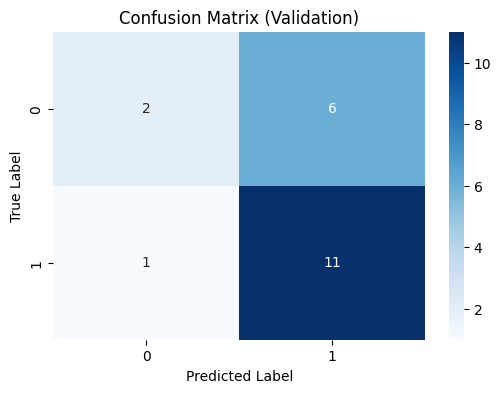

              precision    recall  f1-score   support

           0       0.67      0.25      0.36         8
           1       0.65      0.92      0.76        12

    accuracy                           0.65        20
   macro avg       0.66      0.58      0.56        20
weighted avg       0.65      0.65      0.60        20



In [ ]:
# Plot confusion matrix
cm = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title("Confusion Matrix (Validation)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print(classification_report(y_val, y_val_pred))

In [ ]:
def predict_video(video_path):

    faces = extract_faces_from_video(video_path)
    if not faces:
        print("No face detected in the video. Cannot make a prediction.")
        return None
    # Average features from all detected faces in the video
    features_list = [extract_features_from_face(face) for face in faces]
    features_avg = np.mean(features_list, axis=0)
    features_avg = np.expand_dims(features_avg, axis=0)
    prob = model.predict(features_avg)[0][0]
    prediction = "Manipulated (Deepfake)" if prob > 0.5 else "Original (Real)"
    print(f"Prediction: {prediction} (Probability: {prob:.2f})")
    return prediction




In [ ]:
predict_video("/kaggle/input/deep-fake-detection-dfd-entire-original-dataset/DFD_manipulated_sequences/DFD_manipulated_sequences/01_02__exit_phone_room__YVGY8LOK.mp4")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 335ms/step
Prediction: Manipulated (Deepfake) (Probability: 0.98)


'Manipulated (Deepfake)'

In [ ]:
predict_video("/kaggle/input/deep-fake-detection-dfd-entire-original-dataset/DFD_original sequences/01__exit_phone_room.mp4")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: Original (Real) (Probability: 0.31)


'Original (Real)'

In [ ]:
predict_video("/kaggle/input/faceforensics/FF++/fake/01_02__outside_talking_still_laughing__YVGY8LOK.mp4")


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Prediction: Manipulated (Deepfake) (Probability: 0.90)


'Manipulated (Deepfake)'

In [ ]:
predict_video("/kaggle/input/faceforensics/FF++/real/01__exit_phone_room.mp4")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Prediction: Original (Real) (Probability: 0.31)


'Original (Real)'

In [ ]:
model.save("deepfake_detection_model.keras")

In [ ]:
from tensorflow.keras.regularizers import l2

model2 = Sequential([
    Dense(512, input_dim=X_train.shape[1], kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),  # Increased dropout

    Dense(256, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.4),

    Dense(128, kernel_regularizer=l2(0.001)),
    BatchNormalization(),
    LeakyReLU(alpha=0.1),
    Dropout(0.3),

    Dense(1, activation='sigmoid')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [15]:
from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [16]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [ ]:
model2.compile(optimizer=Adam(learning_rate=0.0005), loss='binary_crossentropy', metrics=['accuracy'])

history = model2.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=32,
    callbacks=[early_stop, reduce_lr]
)


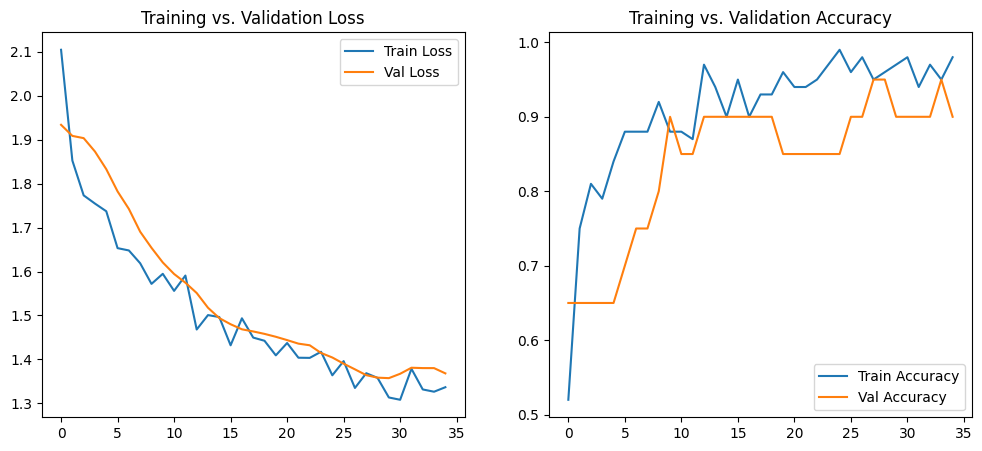

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Training vs. Validation Loss")

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title("Training vs. Validation Accuracy")
plt.show()


In [ ]:
model2.save("deepfake_detection_model2.keras")
